# Assignment - Wines
Marja Satukangas 8.2.2021

In this assignment I created a model that predicts wine quality based on wine properties.

In the beginning of the document there are answers for the questions and after them comes the Python code.

## 1. Regression equation

Regression equation is 

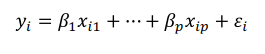

where Beta-values are coefficient values and x-values are values of the parameters. Last value is the intercept value, which in this case is 5.65. Coefficient values are shown below:

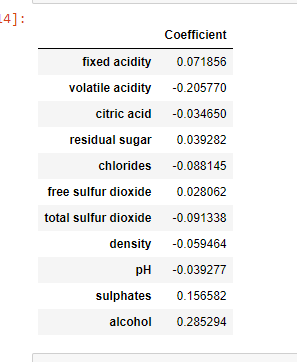

## 2. Most useful variables

From the table above we can see that the most useful variables to estimate wine quality are:

1. Alcohol
2. Volatile acidity
3. Sulphates
4. Total sulfur dioxide
5. Chlorides

## 3. Error estimate

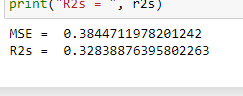

MSE for test set is 0.38 and R2s is 0.33. Low R2-value shows that wine quality is not very dependent of the explanatory variables.

In [1]:
# Importing necessary libraries

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers.experimental import preprocessing


In [2]:
# Location of the original file
filelocation = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/"
file_red = "winequality-red.csv"
#file_white = "winequality-white.csv"

# Read the dataset 
#dataset_white = pd.read_csv((filelocation+file), na_values = '?', sep = ';')
dataset_red = pd.read_csv((filelocation+file_red), na_values = '?', sep = ';')

# dataset to dataframe and show first 10 rows
df_red = pd.DataFrame(dataset_red)
df_red.head(10)

#df_white = pd.DataFrame(dataset_white)
#df_white.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
colnames = df_red.columns.values
colnames

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [4]:
df_red.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [5]:
#types of values
df_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
#check missing values
df_red.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#statistics
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
#check correllations
correlations = df_red.corr()
correlations

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


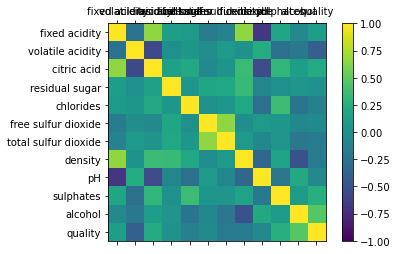

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
fig.colorbar(cax)
ax.set_xticklabels(list(df_red.columns))
ax.set_yticklabels(list(df_red.columns))
plt.show()

In [10]:
# Separate the features and labels
X = df_red.iloc[:,:11].values
Y = df_red.iloc[:, 11].values

In [11]:
#standardize X-values
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [13]:
# build and fit model
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [14]:
#Coefficient values

x_columns = df_red.iloc[:,:11].columns.values

coeff_df = pd.DataFrame(reg.coef_, x_columns, columns=['Coefficient'])
coeff_df


,Coefficient
fixed acidity,0.071856
volatile acidity,-0.205770
citric acid,-0.034650
residual sugar,0.039282
chlorides,-0.088145
free sulfur dioxide,0.028062
total sulfur dioxide,-0.091338
density,-0.059464
pH,-0.039277
sulphates,0.156582


In [15]:
# Intercept
print("Intercept:", reg.intercept_)

Intercept: 5.650290803203522


In [16]:
# compute predicted values for test set
Y_pred = reg.predict(X_test)

In [17]:
# print predicted values compared to actual values
predictions = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
predictions

,Actual,Predicted
0,6,5.782930
1,5,5.036193
2,7,6.596989
3,6,5.339126
4,5,5.939529
...,...,...
315,6,6.559757
316,4,6.017576
317,5,6.251291
318,4,5.163926


In [18]:
# compute error statistics
mse = mean_squared_error(Y_test, Y_pred)
r2s = r2_score(Y_test, Y_pred) 
print("MSE = ", mse)
print("R2s = ", r2s)

MSE =  0.3844711978201242
R2s =  0.32838876395802263
